In [1]:
import numpy as np
import pandas as pd
import dateparser
import os, sys
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
sys.path.insert(0, os.path.abspath(".."))
from src.utils import eda

In [3]:
tesis_juris = pd.read_pickle('../output/tesis_juris.pkl')

In [4]:
tesis_juris

,id_tesis,tesis,instancia,epoca,materia,#_reiteracion,ponente,secretario,fecha_texto,fecha
0,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,1,Jaime Raúl Oropeza García,Roberto Carlos Moreno Zamorano,19 de febrero de 2004,2004-02-19
1,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,2,Ma. del Pilar Núñez González,José Fernández Martínez,17 de febrero de 2005,2005-02-17
2,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,3,Manuel Rojas Fonseca,Juan Carlos Ríos López,23 de febrero de 2006,2006-02-23
3,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,4,Jaime Raúl Oropeza García,Alejandro Ramos García,25 de mayo de 2006,2006-05-25
4,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,5,Jaime Raúl Oropeza García,Clemente Delgado Salgado,30 de noviembre de 2006,2006-11-30
...,...,...,...,...,...,...,...,...,...,...
0,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,1,José Galván Rojas,Jorge Patlán Origel,2 de junio de 1988,1988-06-02
1,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,2,Arnoldo Nájera Virgen,Enrique Crispín Campos Ramírez,11 de abril de 1989,1989-04-11
2,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,3,Arnoldo Nájera Virgen,Nelson Loranca Ventura,26 de mayo de 1989,1989-05-26
3,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,4,Gustavo Calvillo Rangel,Humberto Schettino Reyna,3 de abril de 1990,1990-04-03


## EDA: Tesis JxR (Jurisprudencia por Reiteración)

In [5]:
tesis_juris.dtypes

id_tesis                 object
tesis                    object
instancia                object
epoca                    object
materia                  object
#_reiteracion             int64
ponente                  object
secretario               object
fecha_texto              object
fecha            datetime64[ns]
dtype: object

In [6]:
# Cambiamos tipos de datos para hacer perfilamiento
tesis_juris = tesis_juris.astype({'id_tesis':'category',
                                  'tesis':'category', 
                                  'instancia':'category', 
                                  'epoca':'category', 
                                  'materia':'category',
                                  '#_reiteracion':'category', 
                                  'ponente':'category' , 
                                  'secretario':'category'}) 

In [7]:
_,profiling_categoricas,_,profiling_fechas = eda.genera_profiling_por_variable(tesis_juris)

In [8]:
profiling_fechas

,Métrica,fecha
0,Tipo,datetime64[ns]
1,Número de observaciones,"56,553"
2,Mínimo,1929-05-17
3,Máximo,2022-08-20
4,Número de obs. únicas,"9,086"
5,Número de faltantes,4
6,Top1/veces/%,"[2008-06-19, 461, 0.82%]"
7,Top2/veces/%,"[2009-11-04, 177, 0.31%]"
8,Top3/veces/%,"[2016-10-05, 155, 0.27%]"


In [9]:
profiling_categoricas

,Métrica,id_tesis,tesis,instancia,epoca,materia,#_reiteracion,ponente,secretario
0,Tipo,category,category,category,category,category,category,category,category
1,Número de categorías,"11,278","9,150",7,6,52,10,"1,728","5,917"
2,Número de observaciones,"56,557","56,557","56,557","56,557","56,557","56,557","56,557","56,557"
3,Obs. nulas,0,0,0,0,0,0,0,0
4,% Obs. nulas,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
5,Obs. NA,0,"6,344",0,0,0,0,11,"5,088"
6,% Obs. NA,0.0%,11.22%,0.0%,0.0%,0.0%,0.0%,0.02%,9.0%
7,Valores únicos,"[159807, 159814, 159824, 159859, 159861, 15986...","[VI.3o.A. J/61, 1a./J. 71/2014 (9a.), X.A.T. J...","[Tribunales Colegiados de Circuito, Primera Sa...","[Décima Época, Novena Época, Undécima Época, O...","[Administrativa, Constitucional, Penal, Labora...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[Jaime Raúl Oropeza García, Ma. del Pilar Núñe...","[Roberto Carlos Moreno Zamorano, José Fernánde..."
8,Moda1/veces/%,"[201624, 10, 0.02%]","[NA, 6,344, 11.22%]","[Tribunales Colegiados de Circuito, 35,414, 62...","[Novena Época, 25,580, 45.23%]","[Común, 11,763, 20.8%]","[1, 11,278, 19.94%]","[Gustavo Calvillo Rangel, 1,510, 2.67%]","[NA, 5,088, 9.0%]"
9,Moda2/veces/%,"[388026, 10, 0.02%]","[1, 58, 0.1%]","[Segunda Sala, 8,341, 14.75%]","[Octava Época, 13,503, 23.88%]","[Administrativa, 10,231, 18.09%]","[2, 11,278, 19.94%]","[Mariano Azuela Güitrón, 1,328, 2.35%]","[Humberto Schettino Reyna, 535, 0.95%]"


In [10]:
eda.CreaTablaConteoPorcentaje(tesis_juris,'ponente',False).head(20)

,Conteo,%
Gustavo Calvillo Rangel,"1,510",2.67%
Mariano Azuela Güitrón,"1,328",2.35%
Juan Díaz Romero,"1,076",1.9%
José Ramón Cossío Díaz,"1,026",1.81%
Margarita Beatriz Luna Ramos,970,1.72%
Sergio Salvador Aguirre Anguiano,949,1.68%
Guillermo I. Ortiz Mayagoitia,805,1.42%
Juan N. Silva Meza,794,1.4%
Genaro David Góngora Pimentel,787,1.39%
Olga Sánchez Cordero de García Villegas,775,1.37%


In [11]:
eda.CreaTablaConteoPorcentaje(tesis_juris,'secretario',False).head(20)

,Conteo,%
NA,"5,088",9.0%
Humberto Schettino Reyna,535,0.95%
Armando Cortés Galván,477,0.84%
"Georgina Laso de la Vega Romero, Sofía Verónica Ávalos Díaz, María Marcela Ramírez Cerrillo, Carmen Vergara López, Gustavo Ruiz Padilla y Luciano Valadez Pérez",449,0.79%
Jorge Alberto González Alvarez,424,0.75%
Lourdes Ferrer Mac Gregor Poisot,326,0.58%
José Mario Machorro Castillo,245,0.43%
Nelson Loranca Ventura,226,0.4%
María Estela Ferrer Mac Gregor Poisot,205,0.36%
Enrique Baigts Muñoz,190,0.34%


In [12]:
eda.CreaTablaConteoPorcentajeGrupo(tesis_juris,'instancia','id_tesis',False)

,Conteo,%
Tribunales Colegiados de Circuito,"7,079",62.77%
Segunda Sala,"1,668",14.79%
Pleno,921,8.17%
Primera Sala,868,7.7%
Cuarta Sala,426,3.78%
Tercera Sala,278,2.46%
Sala Auxiliar,38,0.34%


In [13]:
eda.CreaTablaConteoPorcentajeGrupo(tesis_juris,'epoca','id_tesis',False)

,Conteo,%
Novena Época,"5,114",45.34%
Octava Época,"2,700",23.94%
Décima Época,"2,128",18.87%
Séptima Época,"1,183",10.49%
Sexta Época,139,1.23%
Undécima Época,14,0.12%


## GEDA

In [14]:
# Regresamos tipos de datos
tesis_juris = tesis_juris.astype({'id_tesis':'str',
                                  'tesis':'str', 
                                  'instancia':'str', 
                                  'epoca':'str', 
                                  'materia':'str',
                                  '#_reiteracion':'str', 
                                  'ponente':'str' , 
                                  'secretario':'str'}) 

In [15]:
tesis_juris_aux = tesis_juris.copy()
tesis_juris_aux['fecha_aux'] = pd.to_datetime(tesis_juris_aux['fecha'], format='%m/%d/%Y')
tesis_juris_aux['ones'] = 1
tesis_juris_aux['month'] = tesis_juris_aux.fecha_aux.dt.month
tesis_juris_aux['year'] = tesis_juris_aux.fecha_aux.dt.year

In [16]:
tesis_instancia = pd.DataFrame(tesis_juris.groupby(['instancia'])['id_tesis'].nunique())
tesis_instancia = tesis_instancia.rename_axis(None)
tesis_instancia = tesis_instancia.rename(columns={'id_tesis': 'Conteo'})
tesis_instancia = tesis_instancia.astype({'Conteo':'int'}) 
tesis_instancia = tesis_instancia.sort_values(by=['Conteo'], ascending=False)

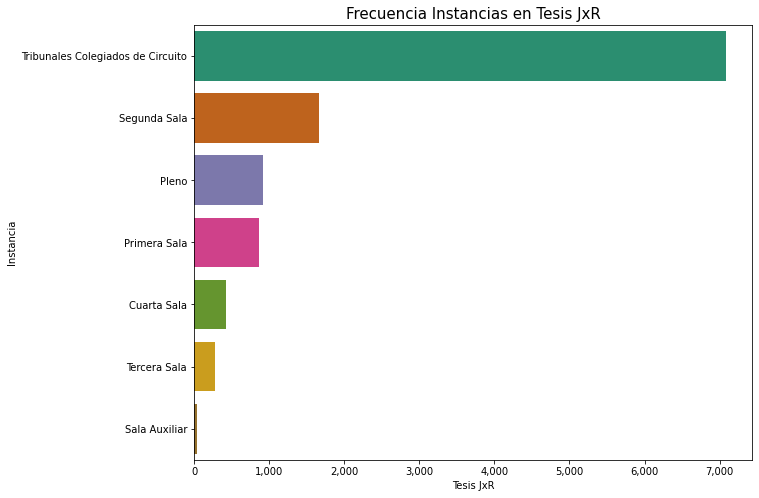

In [17]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = tesis_instancia.index, x = 'Conteo', data = tesis_instancia, palette = 'Dark2')
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Frecuencia Instancias en Tesis JxR', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Instancia')
plt.show()

In [18]:
tesis_epoca = pd.DataFrame(tesis_juris.groupby(['epoca'])['id_tesis'].nunique())
tesis_epoca = tesis_epoca.rename_axis(None)
tesis_epoca = tesis_epoca.rename(columns={'id_tesis': 'Conteo'})
tesis_epoca = tesis_epoca.astype({'Conteo':'int'}) 
tesis_epoca = tesis_epoca.sort_values(by=['Conteo'], ascending=False)
tesis_epoca = tesis_epoca.reindex(index = ['Sexta Época','Séptima Época','Octava Época','Novena Época','Décima Época','Undécima Época'])

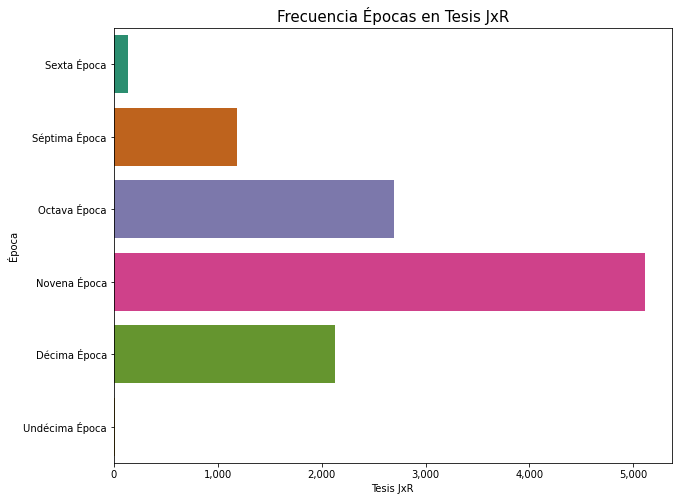

In [19]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = tesis_epoca.index, x = 'Conteo', data = tesis_epoca, palette = 'Dark2')
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Frecuencia Épocas en Tesis JxR', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Época')
plt.show()

In [20]:
tesis_materia_final = pd.DataFrame({
    'Materia': {0: 'Administrativa', 1: 'Común', 2: 'Laboral', 3: 'Constitucional', 4: 'Civil', 5: 'Penal'},
    'Conteo': {0: 3545, 1: 3003, 2: 2262, 3: 1955, 4: 1428, 5: 1425}
})

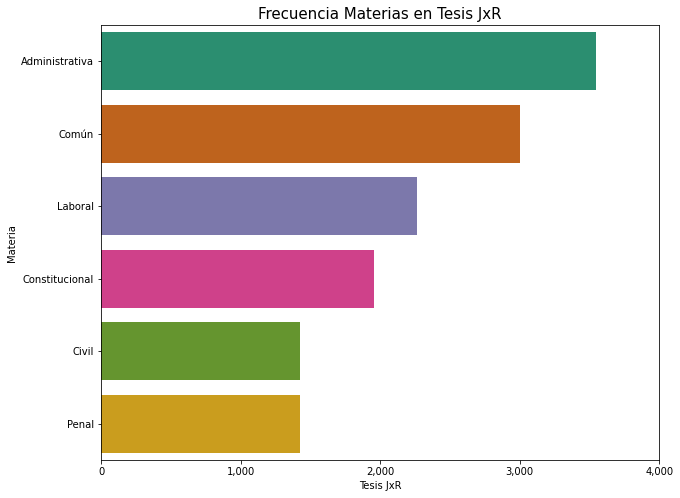

In [21]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Materia', x = 'Conteo', data = tesis_materia_final, palette = 'Dark2')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Frecuencia Materias en Tesis JxR', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Materia')
plt.xlim(0,4000)
plt.show()

In [22]:
tesis_tiempo = tesis_juris_aux.copy()
tesis_tiempo = pd.DataFrame(tesis_tiempo[['id_tesis','year']].groupby(['year'])['id_tesis'].nunique().reset_index())

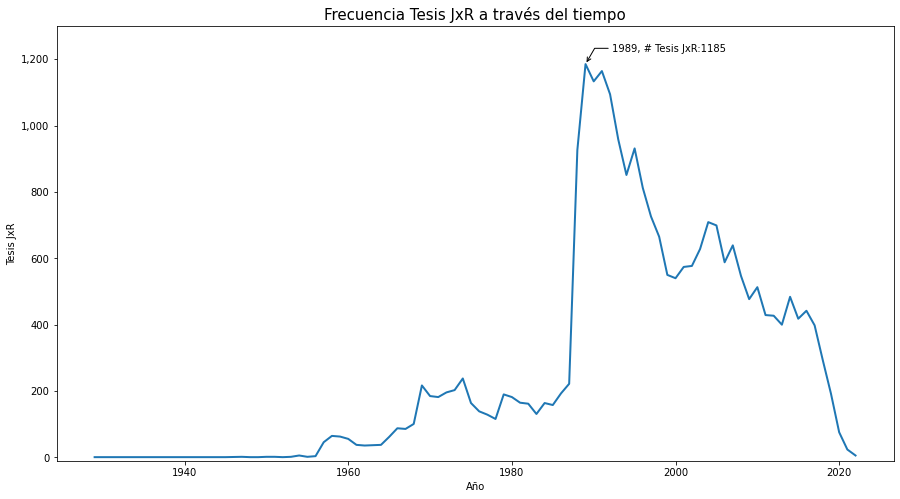

In [23]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(y='id_tesis',x ='year',data=tesis_tiempo,linewidth=2,)

ymax = int(tesis_tiempo.iloc[tesis_tiempo['id_tesis'].idxmax()]['id_tesis'])
xmax = int(tesis_tiempo.iloc[tesis_tiempo['id_tesis'].idxmax()]['year'])

text= "{:}, # Tesis JxR:{:}".format(xmax, ymax)
arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, ha="right", va="top") 
ax.annotate(text, xy=(xmax, ymax), xytext=(0.8,0.96), **kw)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Frecuencia Tesis JxR a través del tiempo', fontsize=15)
plt.xlabel('Año')
plt.ylabel('Tesis JxR')
plt.ylim(-10,1300)
plt.show()

In [24]:
pivot_instancia = tesis_juris_aux.copy()
pivot_instancia = pivot_instancia[['id_tesis','instancia','year']].groupby(['instancia','year'])['id_tesis'].nunique().reset_index()
pivot_instancia = pivot_instancia.pivot(index='year', columns='instancia', values='id_tesis')
pivot_instancia = pd.DataFrame(pivot_instancia)
pivot_instancia.reset_index(inplace=True)
pivot_instancia = pivot_instancia[['year','Tribunales Colegiados de Circuito','Pleno','Primera Sala','Segunda Sala','Tercera Sala','Cuarta Sala','Sala Auxiliar']]

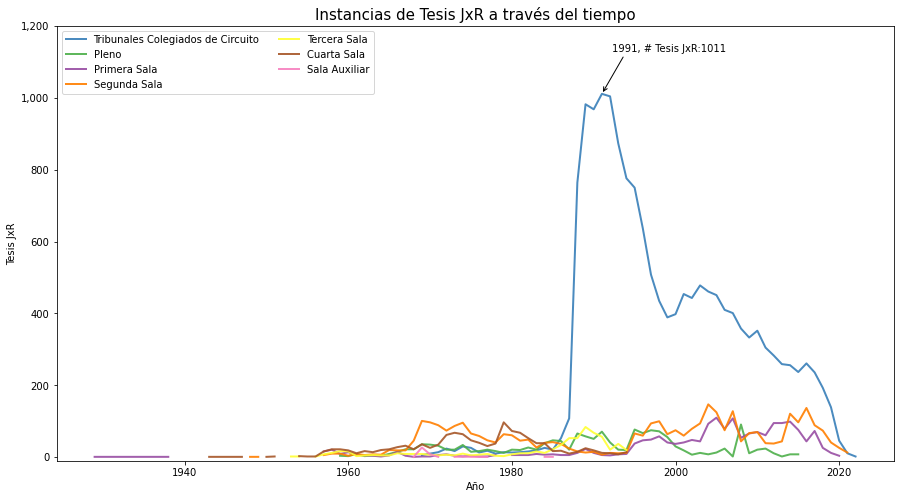

In [25]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
palette = plt.get_cmap('Set1')
i = 0
for column in pivot_instancia.drop('year',axis=1):
    i += 1
    plt.plot(pivot_instancia['year'],
             pivot_instancia[column],
             marker='',
             color=palette(i),
             linewidth=2,
             alpha=0.9,
             label=column)

ymax = int(pivot_instancia.iloc[pivot_instancia['Tribunales Colegiados de Circuito'].idxmax()]['Tribunales Colegiados de Circuito'])
xmax = int(pivot_instancia.iloc[pivot_instancia['Tribunales Colegiados de Circuito'].idxmax()]['year'])
text = "{:}, # Tesis JxR:{:}".format(xmax, ymax)
arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, ha="right", va="top") 
ax.annotate(text, xy=(xmax, ymax), xytext=(0.8,0.96), **kw)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.legend(loc=2, ncol=2)
plt.title('Instancias de Tesis JxR a través del tiempo', fontsize=15)
plt.xlabel('Año')
plt.ylabel('Tesis JxR')
plt.ylim(-10,1200)
plt.show()

In [26]:
pivot_epoca = tesis_juris_aux.copy()
pivot_epoca = pivot_epoca[['id_tesis','epoca','year']].groupby(['epoca','year'])['id_tesis'].nunique().reset_index()
pivot_epoca = pivot_epoca.pivot(index='year', columns='epoca', values='id_tesis')
pivot_epoca = pd.DataFrame(pivot_epoca)
pivot_epoca.reset_index(inplace=True)
pivot_epoca = pivot_epoca[['year','Sexta Época','Séptima Época','Octava Época','Novena Época','Décima Época','Undécima Época']]

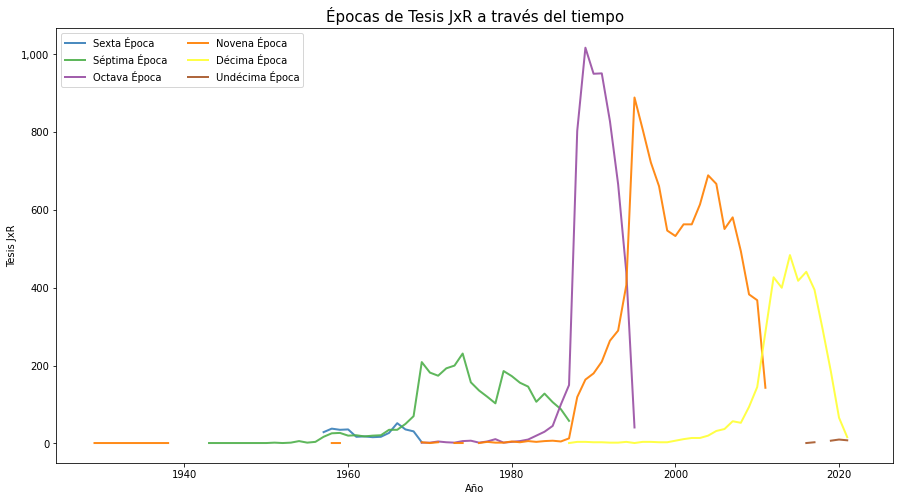

In [27]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
palette = plt.get_cmap('Set1')
i = 0
for column in pivot_epoca.drop('year', axis=1):
    i += 1
    plt.plot(pivot_epoca['year'],
             pivot_epoca[column],
             marker='', 
             color=palette(i), 
             linewidth=2, 
             alpha=0.9, 
             label=column)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(loc=2, ncol=2)
plt.title('Épocas de Tesis JxR a través del tiempo', fontsize=15)
plt.xlabel('Año')
plt.ylabel('Tesis JxR')
plt.show()

### Separando por Épocas

In [28]:
sexta_epoca = tesis_juris_aux.loc[tesis_juris_aux['epoca'] == 'Sexta Época']
septima_epoca = tesis_juris_aux.loc[tesis_juris_aux['epoca'] == 'Séptima Época']
octava_epoca = tesis_juris_aux.loc[tesis_juris_aux['epoca'] == 'Octava Época']
novena_epoca = tesis_juris_aux.loc[tesis_juris_aux['epoca'] == 'Novena Época']
decima_epoca = tesis_juris_aux.loc[tesis_juris_aux['epoca'] == 'Décima Época']
undecima_epoca = tesis_juris_aux.loc[tesis_juris_aux['epoca'] == 'Undécima Época']

In [29]:
sexta_epoca_tiempo_reit = pd.DataFrame(sexta_epoca['year'].value_counts(dropna=False)).reset_index().sort_values(by=['index'],ascending=True)
sexta_epoca_tiempo_reit = sexta_epoca_tiempo_reit.rename(columns={'year':'reiteraciones','index':'year'})

septima_epoca_tiempo_reit = pd.DataFrame(septima_epoca['year'].value_counts(dropna=False)).reset_index().sort_values(by=['index'],ascending=True)
septima_epoca_tiempo_reit = septima_epoca_tiempo_reit.rename(columns={'year':'reiteraciones','index':'year'})

octava_epoca_tiempo_reit = pd.DataFrame(octava_epoca['year'].value_counts(dropna=False)).reset_index().sort_values(by=['index'],ascending=True)
octava_epoca_tiempo_reit = octava_epoca_tiempo_reit.rename(columns={'year':'reiteraciones','index':'year'})

novena_epoca_tiempo_reit = pd.DataFrame(novena_epoca['year'].value_counts(dropna=False)).reset_index().sort_values(by=['index'],ascending=True)
novena_epoca_tiempo_reit = novena_epoca_tiempo_reit.rename(columns={'year':'reiteraciones','index':'year'})

decima_epoca_tiempo_reit = pd.DataFrame(decima_epoca['year'].value_counts(dropna=False)).reset_index().sort_values(by=['index'],ascending=True)
decima_epoca_tiempo_reit = decima_epoca_tiempo_reit.rename(columns={'year':'reiteraciones','index':'year'})

undecima_epoca_tiempo_reit = pd.DataFrame(undecima_epoca['year'].value_counts(dropna=False)).reset_index().sort_values(by=['index'],ascending=True)
undecima_epoca_tiempo_reit = undecima_epoca_tiempo_reit.rename(columns={'year':'reiteraciones','index':'year'})


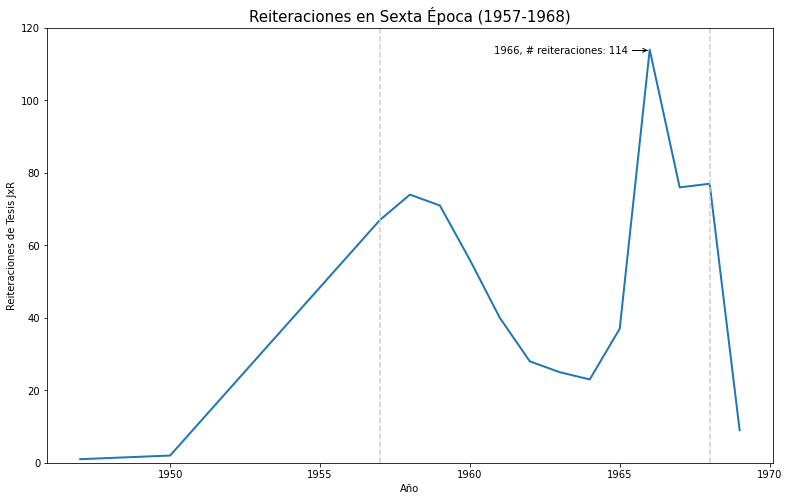

In [30]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(y='reiteraciones',x ='year',data=sexta_epoca_tiempo_reit,linewidth=2,)

ymax = int(max(sexta_epoca_tiempo_reit['reiteraciones']))
xmax = int(sexta_epoca_tiempo_reit.loc[sexta_epoca_tiempo_reit['reiteraciones'] == ymax]['year'])

text= "{:}, # reiteraciones: {:}".format(xmax, ymax)
arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, ha="right", va="top") 
ax.annotate(text, xy=(xmax, ymax), xytext=(0.8,0.96), **kw)

plt.title('Reiteraciones en Sexta Época (1957-1968)', fontsize=15)
plt.xlabel('Año')
plt.ylabel('Reiteraciones de Tesis JxR')
plt.ylim(0,120)
plt.axvline(x=1957, color='0.8', ls='--')
plt.axvline(x=1968, color='0.8', ls='--')
plt.show()

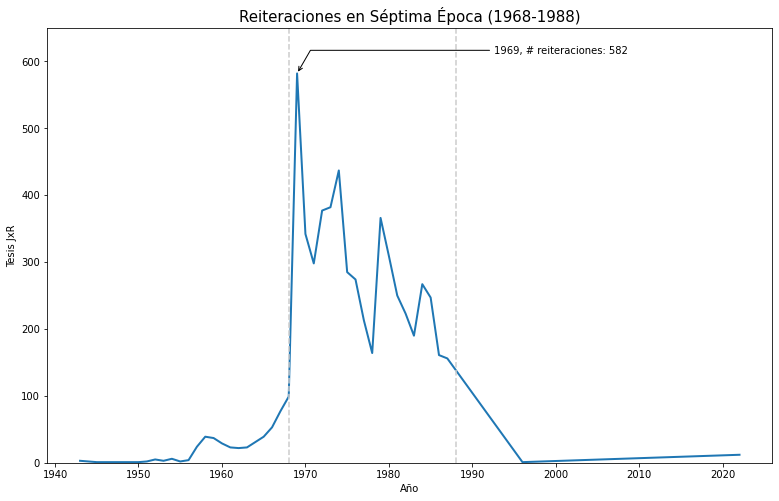

In [31]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(y='reiteraciones',x ='year',data=septima_epoca_tiempo_reit,linewidth=2,)

ymax = int(max(septima_epoca_tiempo_reit['reiteraciones']))
xmax = int(septima_epoca_tiempo_reit.loc[septima_epoca_tiempo_reit['reiteraciones'] == ymax]['year'])

text= "{:}, # reiteraciones: {:}".format(xmax, ymax)
arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, ha="right", va="top") 
ax.annotate(text, xy=(xmax, ymax), xytext=(0.8,0.96), **kw)

plt.title('Reiteraciones en Séptima Época (1968-1988)', fontsize=15)
plt.xlabel('Año')
plt.ylabel('Tesis JxR')
plt.ylim(0,650)
plt.axvline(x=1968, color='0.8', ls='--')
plt.axvline(x=1988, color='0.8', ls='--')
plt.show()

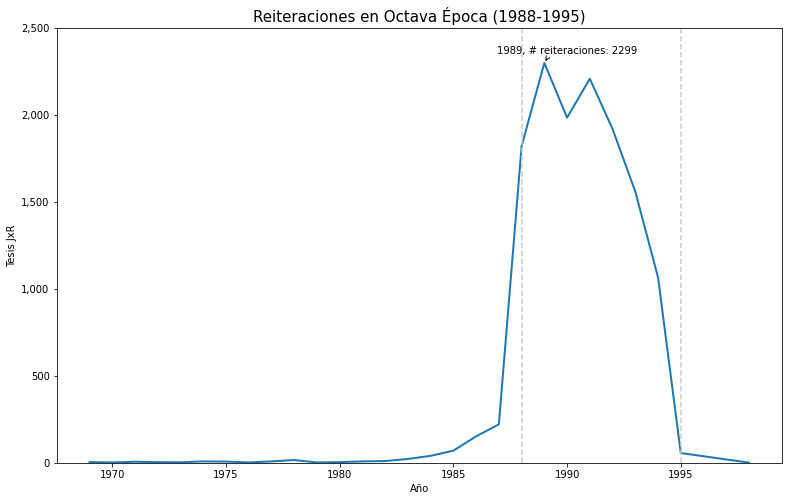

In [32]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(y='reiteraciones',x ='year',data=octava_epoca_tiempo_reit,linewidth=2,)

ymax = int(max(octava_epoca_tiempo_reit['reiteraciones']))
xmax = int(octava_epoca_tiempo_reit.loc[octava_epoca_tiempo_reit['reiteraciones'] == ymax]['year'])

text= "{:}, # reiteraciones: {:}".format(xmax, ymax)
arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, ha="right", va="top") 
ax.annotate(text, xy=(xmax, ymax), xytext=(0.8,0.96), **kw)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Reiteraciones en Octava Época (1988-1995)', fontsize=15)
plt.xlabel('Año')
plt.ylabel('Tesis JxR')
plt.ylim(0,2500)
plt.axvline(x=1988, color='0.8', ls='--')
plt.axvline(x=1995, color='0.8', ls='--')
plt.show()

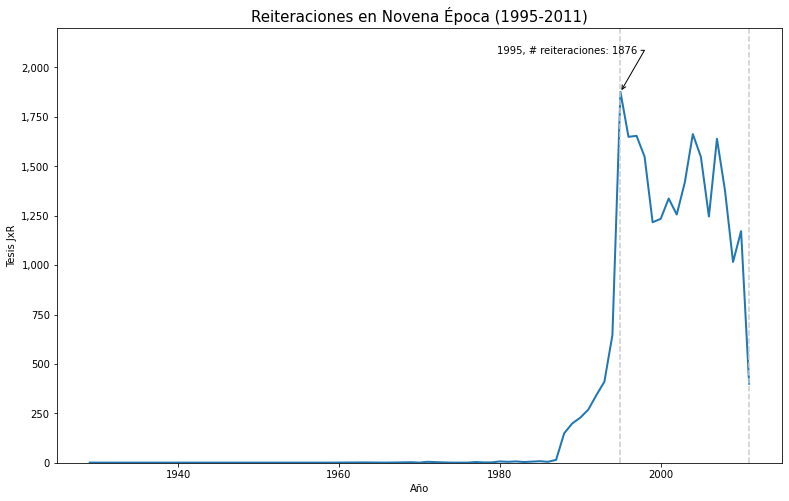

In [33]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(y='reiteraciones',x ='year',data=novena_epoca_tiempo_reit,linewidth=2,)

ymax = int(max(novena_epoca_tiempo_reit['reiteraciones']))
xmax = int(novena_epoca_tiempo_reit.loc[novena_epoca_tiempo_reit['reiteraciones'] == ymax]['year'])

text= "{:}, # reiteraciones: {:}".format(xmax, ymax)
arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, ha="right", va="top") 
ax.annotate(text, xy=(xmax, ymax), xytext=(0.8,0.96), **kw)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Reiteraciones en Novena Época (1995-2011)', fontsize=15)
plt.xlabel('Año')
plt.ylabel('Tesis JxR')
plt.ylim(0,2200)
plt.axvline(x=1995, color='0.8', ls='--')
plt.axvline(x=2011, color='0.8', ls='--')
plt.show()

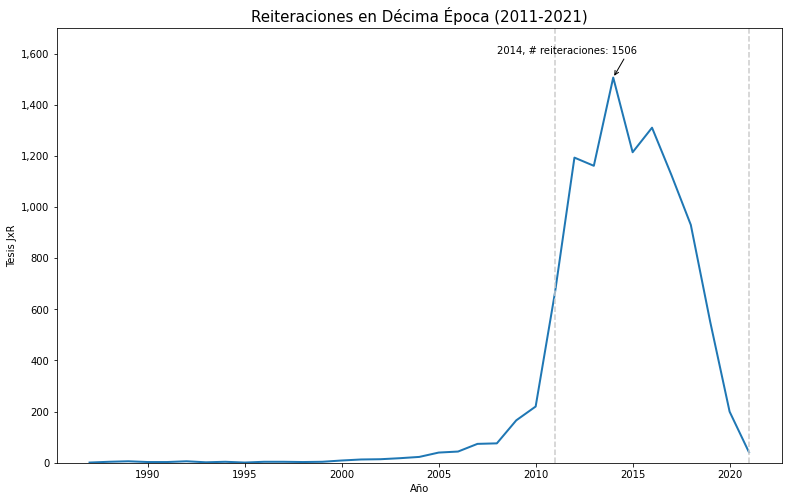

In [34]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(y='reiteraciones',x ='year',data=decima_epoca_tiempo_reit,linewidth=2,)

ymax = int(max(decima_epoca_tiempo_reit['reiteraciones']))
xmax = int(decima_epoca_tiempo_reit.loc[decima_epoca_tiempo_reit['reiteraciones'] == ymax]['year'])

text= "{:}, # reiteraciones: {:}".format(xmax, ymax)
arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, ha="right", va="top") 
ax.annotate(text, xy=(xmax, ymax), xytext=(0.8,0.96), **kw)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Reiteraciones en Décima Época (2011-2021)', fontsize=15)
plt.xlabel('Año')
plt.ylabel('Tesis JxR')
plt.ylim(0,1700)
plt.axvline(x=2011, color='0.8', ls='--')
plt.axvline(x=2021, color='0.8', ls='--')
plt.show()

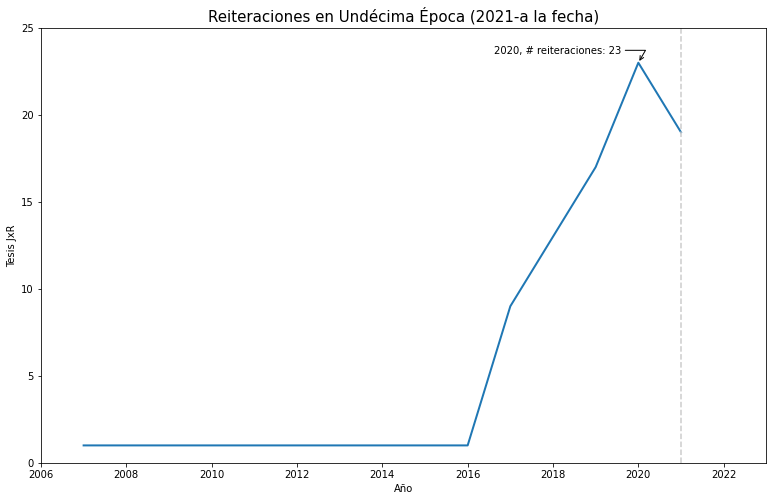

In [35]:
plt.figure(figsize=(13,8))
ax = sns.lineplot(y='reiteraciones',x ='year',data=undecima_epoca_tiempo_reit,linewidth=2,)

ymax = int(max(undecima_epoca_tiempo_reit['reiteraciones']))
xmax = int(undecima_epoca_tiempo_reit.loc[undecima_epoca_tiempo_reit['reiteraciones'] == ymax]['year'])

text= "{:}, # reiteraciones: {:}".format(xmax, ymax)
arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, ha="right", va="top") 
ax.annotate(text, xy=(xmax, ymax), xytext=(0.8,0.96), **kw)

plt.title('Reiteraciones en Undécima Época (2021-a la fecha)', fontsize=15)
plt.xlabel('Año')
plt.ylabel('Tesis JxR')
plt.ylim(0,25)
plt.xlim(2006,2023)
plt.axvline(x=2021, color='0.8', ls='--')
plt.show()

### Tiempo entre reiteraciones

In [36]:
def tiempo_entre_reit(df,epoca):
    
    primera = pd.DataFrame(df.groupby('id_tesis')['fecha'].first()).reset_index()
    primera = primera.rename(columns={'fecha': 'primera_reit'})
    ultima = pd.DataFrame(df.groupby('id_tesis')['fecha'].last()).reset_index()
    ultima = ultima.rename(columns={'fecha': 'ultima_reit'})
    dif = pd.merge(primera, ultima, how='left')
    dif['dif_dias'] = (dif['ultima_reit'] - dif['primera_reit']) / np.timedelta64(1,'D')
    dif['dif_semanas'] = (dif['ultima_reit'] - dif['primera_reit']) / np.timedelta64(1,'W')
    dif['dif_meses'] = (dif['ultima_reit'] - dif['primera_reit']) / np.timedelta64(1,'M')
    dif['dif_años'] = (dif['ultima_reit'] - dif['primera_reit']) / np.timedelta64(1,'Y')
    dif['epoca'] = [(epoca) for i in range(len(dif))]
    
    return dif

In [37]:
dif_epoca_11 = tiempo_entre_reit(undecima_epoca,'Undécima')
dif_epoca_10 = tiempo_entre_reit(decima_epoca,'Décima')
dif_epoca_09 = tiempo_entre_reit(novena_epoca,'Novena')
dif_epoca_08 = tiempo_entre_reit(octava_epoca,'Octava')
dif_epoca_07 = tiempo_entre_reit(septima_epoca,'Séptima')
dif_epoca_06 = tiempo_entre_reit(sexta_epoca,'Sexta')

In [38]:
df_tiempo_entre_reit = pd.concat([dif_epoca_06, dif_epoca_07, dif_epoca_08, dif_epoca_09, dif_epoca_10, dif_epoca_11])
df_tiempo_entre_reit

,id_tesis,primera_reit,ultima_reit,dif_dias,dif_semanas,dif_meses,dif_años,epoca
0,257627,1966-02-01,1967-08-22,567.0,81.000000,18.628719,1.552393,Sexta
1,257775,1961-03-07,1968-12-03,2828.0,404.000000,92.913612,7.742801,Sexta
2,258809,1964-03-17,1967-11-23,1346.0,192.285714,44.222674,3.685223,Sexta
3,258810,1962-06-21,1967-09-22,1919.0,274.142857,63.048523,5.254044,Sexta
4,258941,1958-10-20,1967-03-10,3063.0,437.571429,100.634510,8.386209,Sexta
...,...,...,...,...,...,...,...,...
9,2023179,2020-11-06,2021-02-12,98.0,14.000000,3.219779,0.268315,Undécima
10,2023202,2020-10-22,2021-04-08,168.0,24.000000,5.519621,0.459968,Undécima
11,2023211,2019-05-21,2020-10-27,525.0,75.000000,17.248814,1.437401,Undécima
12,2023249,2019-06-20,2021-02-11,602.0,86.000000,19.778640,1.648220,Undécima


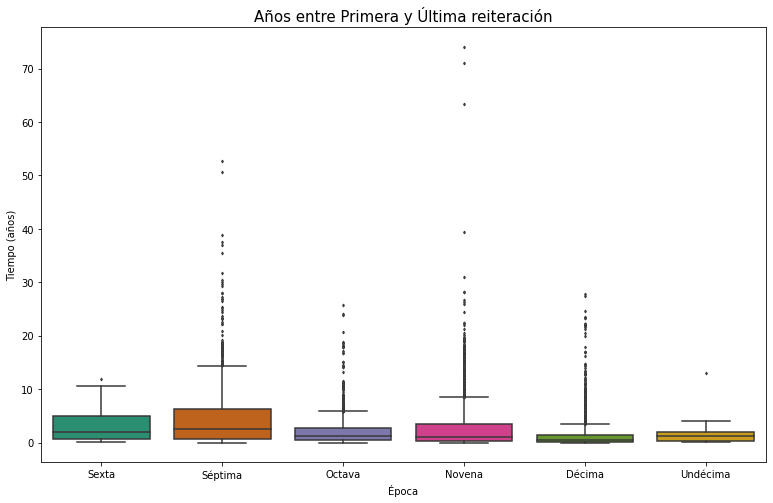

In [39]:
plt.figure(figsize=(13,8))
ax = sns.boxplot(x=df_tiempo_entre_reit['epoca'],y=df_tiempo_entre_reit['dif_años'],palette='Dark2',
                flierprops=dict(markerfacecolor='0.50',markersize = 2))

plt.title('Años entre Primera y Última reiteración', fontsize=15)
plt.xlabel('Época')
plt.ylabel('Tiempo (años)')
plt.show()

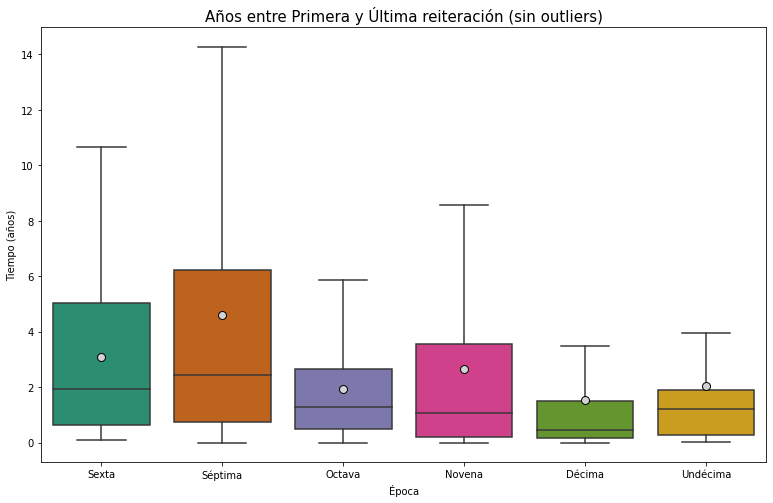

In [40]:
plt.figure(figsize=(13,8))
ax = sns.boxplot(x=df_tiempo_entre_reit['epoca'],y=df_tiempo_entre_reit['dif_años'],palette='Dark2',showmeans=True,showfliers=False,
                meanprops={'marker':'o','markerfacecolor':'lightgrey','markeredgecolor':'black','markersize':'8'})

plt.title('Años entre Primera y Última reiteración (sin outliers)', fontsize=15)
plt.xlabel('Época')
plt.ylabel('Tiempo (años)')
plt.show()

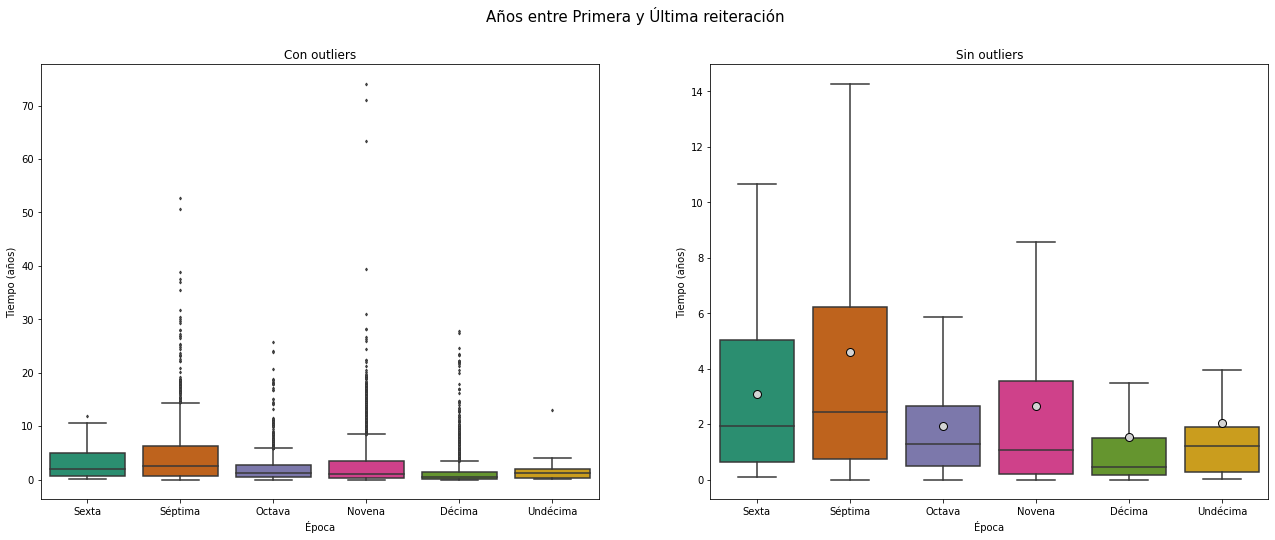

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,8))

ax = sns.boxplot(x=df_tiempo_entre_reit['epoca'],y=df_tiempo_entre_reit['dif_años'],palette='Dark2',ax=axes[0],
                 flierprops=dict(markerfacecolor='0.50',markersize = 2))
axes[0].set_title('Con outliers')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Tiempo (años)')

ax = sns.boxplot(x=df_tiempo_entre_reit['epoca'],y=df_tiempo_entre_reit['dif_años'],palette='Dark2',ax=axes[1],showmeans=True,showfliers=False,
                meanprops={'marker':'o','markerfacecolor':'lightgrey','markeredgecolor':'black','markersize':'8'})
axes[1].set_title('Sin outliers')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Tiempo (años)')

fig.suptitle('Años entre Primera y Última reiteración', fontsize=15)
plt.show()

### Ponentes

In [42]:
top20_ponentes = pd.DataFrame(tesis_juris['ponente'].value_counts()).head(20).reset_index()
top20_ponentes = top20_ponentes.rename(columns={'index':'Ponente','ponente':'Conteo'})
top20_ponentes

,Ponente,Conteo
0,Gustavo Calvillo Rangel,1510
1,Mariano Azuela Güitrón,1328
2,Juan Díaz Romero,1076
3,José Ramón Cossío Díaz,1026
4,Margarita Beatriz Luna Ramos,970
5,Sergio Salvador Aguirre Anguiano,949
6,Guillermo I. Ortiz Mayagoitia,805
7,Juan N. Silva Meza,794
8,Genaro David Góngora Pimentel,787
9,Olga Sánchez Cordero de García Villegas,775


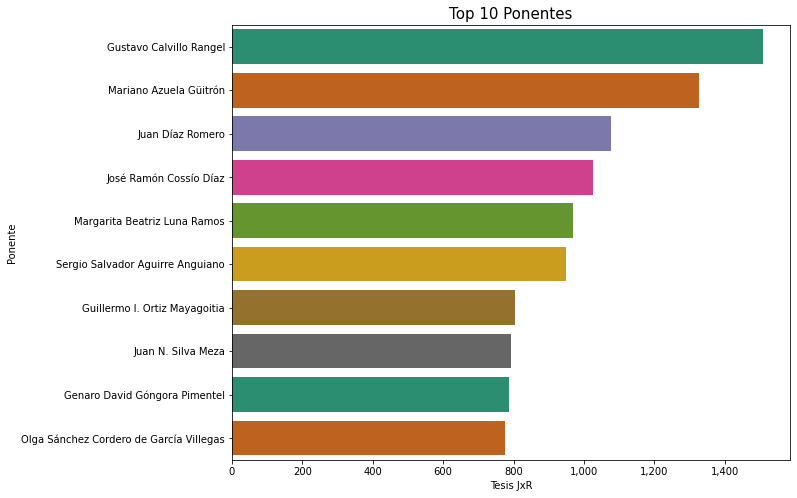

In [43]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Ponente', x = 'Conteo', data = top20_ponentes.iloc[0:10], palette = 'Dark2')
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Top 10 Ponentes', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Ponente')
plt.show()

In [44]:
top_pon_ep6 = pd.DataFrame(tesis_juris.loc[tesis_juris['epoca']=='Sexta Época']['ponente'].value_counts()).head(20).reset_index()
top_pon_ep6 = top_pon_ep6.rename(columns={'index':'Ponente','ponente':'Conteo'})
top_pon_ep6

,Ponente,Conteo
0,Felipe Tena Ramírez,59
1,José Castro Estrada,48
2,Pedro Guerrero Martínez,43
3,Jorge Iñárritu,38
4,Agustín Mercado Alarcón,34
5,Mariano Ramírez Vázquez,29
6,José Rivera Pérez Campos,28
7,Juan José González Bustamante,26
8,Manuel Rivera Silva,26
9,María Cristina Salmorán de Tamayo,24


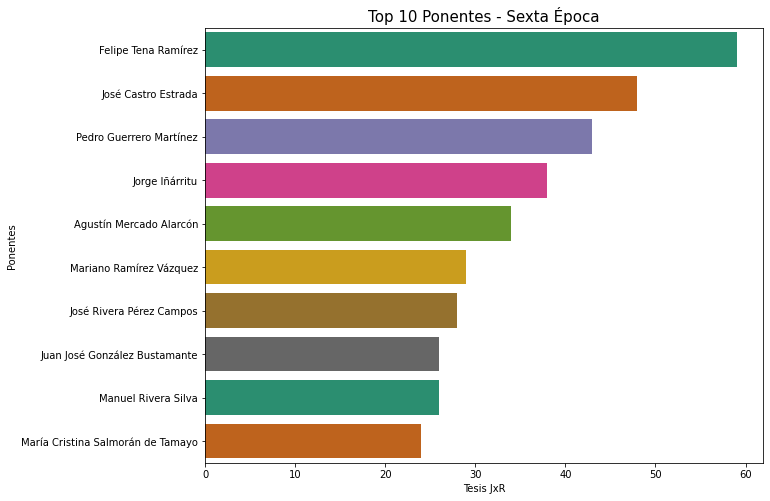

In [45]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Ponente', x = 'Conteo', data = top_pon_ep6.iloc[0:10], palette = 'Dark2')
plt.title('Top 10 Ponentes - Sexta Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Ponentes')
plt.show()

In [46]:
top_pon_ep7 = pd.DataFrame(tesis_juris.loc[tesis_juris['epoca']=='Séptima Época']['ponente'].value_counts()).head(20).reset_index()
top_pon_ep7 = top_pon_ep7.rename(columns={'index':'Ponente','ponente':'Conteo'})
top_pon_ep7

,Ponente,Conteo
0,Carlos del Río Rodríguez,597
1,María Cristina Salmorán de Tamayo,571
2,Jorge Iñárritu,375
3,Pedro Guerrero Martínez,236
4,Luis Felipe Canudas Orezza,223
5,Juan Moisés Calleja García,157
6,Alberto Jiménez Castro,157
7,Jorge Saracho Alvarez,155
8,David Franco Rodríguez,138
9,Ramón Canedo Aldrete,135


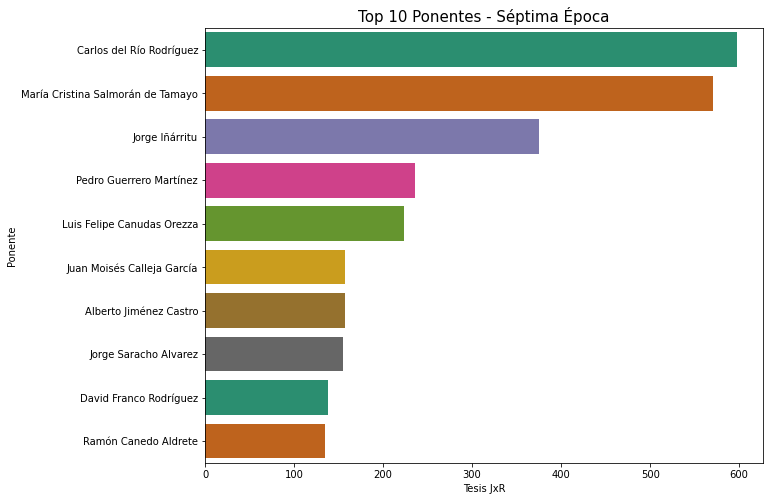

In [47]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Ponente', x = 'Conteo', data = top_pon_ep7.iloc[0:10], palette = 'Dark2')
plt.title('Top 10 Ponentes - Séptima Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Ponente')
plt.show()

In [48]:
top_pon_ep8 = pd.DataFrame(tesis_juris.loc[tesis_juris['epoca']=='Octava Época']['ponente'].value_counts()).head(20).reset_index()
top_pon_ep8 = top_pon_ep8.rename(columns={'index':'Ponente','ponente':'Conteo'})
top_pon_ep8

,Ponente,Conteo
0,Gustavo Calvillo Rangel,801
1,José Galván Rojas,511
2,Mariano Azuela Güitrón,473
3,Arnoldo Nájera Virgen,385
4,Eric Roberto Santos Partido,289
5,Juan Díaz Romero,217
6,Sergio Hugo Chapital Gutiérrez,181
7,Fausta Moreno Flores,166
8,Salvador Rocha Díaz,166
9,Roberto Gómez Argüello,159


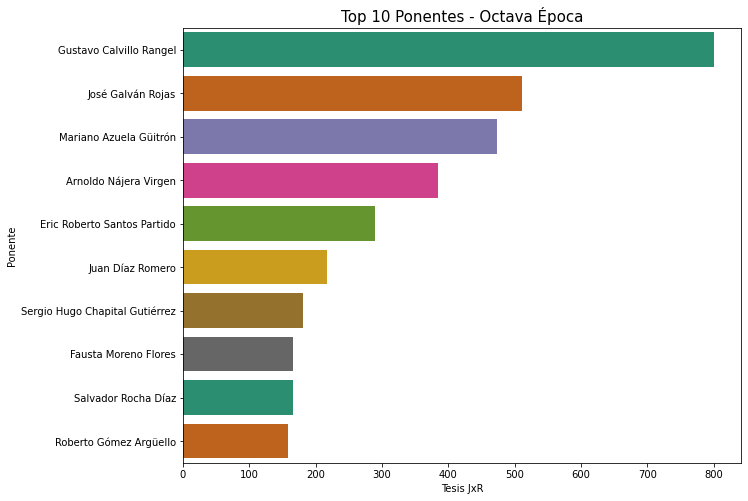

In [49]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Ponente', x = 'Conteo', data = top_pon_ep8.iloc[0:10], palette = 'Dark2')
plt.title('Top 10 Ponentes - Octava Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Ponente')
plt.show()

In [50]:
top_pon_ep9 = pd.DataFrame(tesis_juris.loc[tesis_juris['epoca']=='Novena Época']['ponente'].value_counts()).head(20).reset_index()
top_pon_ep9 = top_pon_ep9.rename(columns={'index':'Ponente','ponente':'Conteo'})
top_pon_ep9

,Ponente,Conteo
0,Sergio Salvador Aguirre Anguiano,882
1,Juan Díaz Romero,836
2,Mariano Azuela Güitrón,760
3,Juan N. Silva Meza,721
4,Guillermo I. Ortiz Mayagoitia,681
5,Genaro David Góngora Pimentel,670
6,Gustavo Calvillo Rangel,640
7,José Ramón Cossío Díaz,603
8,Olga Sánchez Cordero de García Villegas,574
9,José de Jesús Gudiño Pelayo,565


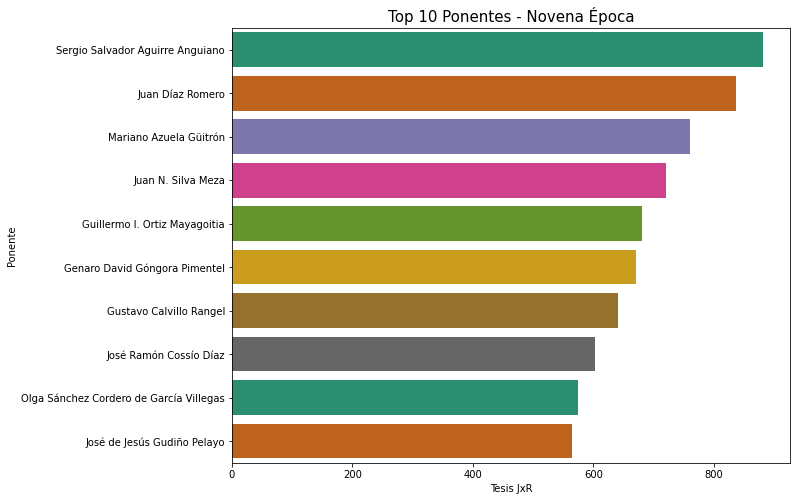

In [51]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Ponente', x = 'Conteo', data = top_pon_ep9.iloc[0:10], palette = 'Dark2')
plt.title('Top 10 Ponentes - Novena Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Ponente')
plt.show()

In [52]:
top_pon_ep10 = pd.DataFrame(tesis_juris.loc[tesis_juris['epoca']=='Décima Época']['ponente'].value_counts()).head(20).reset_index()
top_pon_ep10 = top_pon_ep10.rename(columns={'index':'Ponente','ponente':'Conteo'})
top_pon_ep10

,Ponente,Conteo
0,José Fernando Franco González Salas,535
1,Alberto Pérez Dayán,462
2,José Ramón Cossío Díaz,423
3,Margarita Beatriz Luna Ramos,416
4,Arturo Zaldívar Lelo de Larrea,398
5,Eduardo Medina Mora I,304
6,Jorge Mario Pardo Rebolledo,304
7,Javier Laynez Potisek,272
8,Sergio A. Valls Hernández,215
9,Alfredo Gutiérrez Ortiz Mena,214


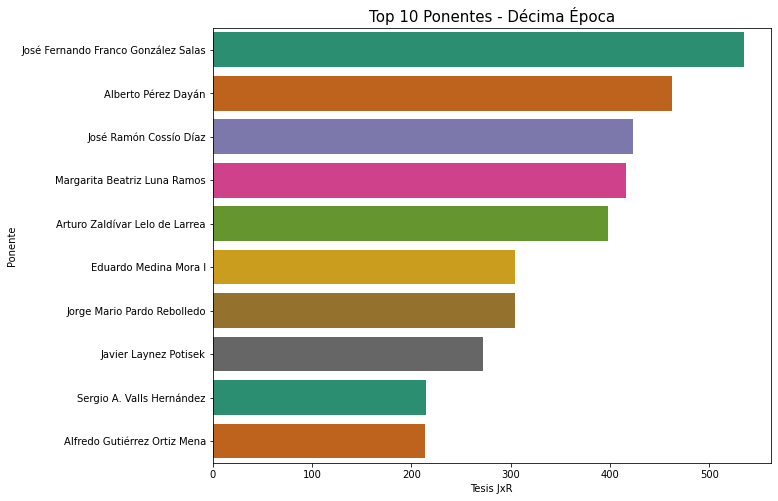

In [53]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Ponente', x = 'Conteo', data = top_pon_ep10.iloc[0:10], palette = 'Dark2')
plt.title('Top 10 Ponentes - Décima Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Ponente')
plt.show()

In [54]:
top_pon_ep11 = pd.DataFrame(tesis_juris.loc[tesis_juris['epoca']=='Undécima Época']['ponente'].value_counts()).head(20).reset_index()
top_pon_ep11 = top_pon_ep11.rename(columns={'index':'Ponente','ponente':'Conteo'})
top_pon_ep11

,Ponente,Conteo
0,Óscar Javier Sánchez Martínez,5
1,Jorge Toss Capistrán,5
2,Pánfilo Martínez Ruiz,4
3,José Fernando Franco González Salas,4
4,Víctor Manuel Flores Jiménez,3
5,Darío Carlos Contreras Favila,3
6,Lilia Mónica López Benítez,3
7,Martín Jesús García Monroy,3
8,Refugio Noel Montoya Moreno,3
9,Marco Polo Rosas Baqueiro,3


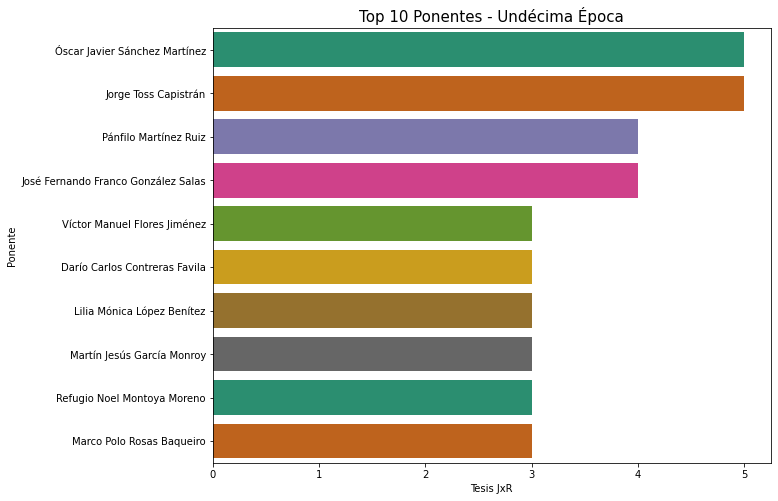

In [55]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Ponente', x = 'Conteo', data = top_pon_ep11.iloc[0:10], palette = 'Dark2')
plt.title('Top 10 Ponentes - Undécima Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Ponente')
plt.show()

### Separando secretarios

In [56]:
nombres_a_reemplazar = {'Alejandrina Castañeda y Morales':'Alejandrina Castañeda Y Morales',
                        'Alicia Guadalupe Díaz y Rea':'Alicia Guadalupe Díaz Y Rea',
                        'Ana Bertha Antúnez de Paz y Puente':'Ana Bertha Antúnez de Paz Y Puente',
                        'Ana María Ibarra Olguín y Javier Mijangos y González':'Ana María Ibarra Olguín y Javier Mijangos Y González',
                        'Armando Argüelles Paz y Puente':'Armando Argüelles Paz Y Puente',
                        'Cistina Ramírez Bohórquez y Cuevas':'Cristina Ramírez Bohórquez Y Cuevas',
                        'Dinora A. Gálvez y Rejón':'Dinora Alicia Gálvez Y Rejón',
                        'Dinora Alicia Gálvez y Rejón':'Dinora Alicia Gálvez Y Rejón',
                        'Dinora A. Gálvez y R':'Dinora Alicia Gálvez Y Rejón',
                        'Guillermo Baltazar y Jiménez':'Guillermo Baltazar Y Jiménez',
                        'Ignacio Manuel Cal y Mayor García':'Ignacio Manuel Cal Y Mayor García',
                        'Javier Mijangos y González':'Javier Mijangos Y González',
                        'Jorge Mason Cal y Mayor':'Jorge Mason Cal Y Mayor',
                        'Jorge Olivera Toro y Alonso':'Jorge Olivera Toro Y Alonso',
                        'Jorge Olivera Toro y Alfonso':'Jorge Olivera Toro Y Alonso',
                        'José Manuel de Alba y de Alba':'José Manuel de Alba Y de Alba',
                        'Luis A. Coaña y Polanco':'Luis Armando Coaña Y Polanco',
                        'Luis Armando Coaña y Polanco':'Luis Armando Coaña Y Polanco',
                        'Luz Helena Orozco y Villa':'Luz Helena Orozco Y Villa',
                        'Marcelo Salles Berges y Chapital':'Marcelo Salles Berges Y Chapital',
                        'Martín Sánchez y Romero':'Martín Sánchez Y Romero',
                        'Othón de Alba y Alba':'Othón de Alba Y Alba',
                        'Rafael Vázquez-Mellado Mier y Terán':'Rafael Vázquez-Mellado Mier Y Terán',
                        'Ramiro Ramírez y Escobedo':'Ramiro Ramírez Y Escobedo',
                        'Sergio Pallares y Lara':'Sergio Pallares Y Lara'}

In [57]:
tesis_juris = tesis_juris.replace({'secretario': nombres_a_reemplazar})        

In [58]:
tesis_secr_expand = tesis_juris.copy().reset_index()
tesis_secr_expand

,index,id_tesis,tesis,instancia,epoca,materia,#_reiteracion,ponente,secretario,fecha_texto,fecha
0,0,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,1,Jaime Raúl Oropeza García,Roberto Carlos Moreno Zamorano,19 de febrero de 2004,2004-02-19
1,1,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,2,Ma. del Pilar Núñez González,José Fernández Martínez,17 de febrero de 2005,2005-02-17
2,2,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,3,Manuel Rojas Fonseca,Juan Carlos Ríos López,23 de febrero de 2006,2006-02-23
3,3,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,4,Jaime Raúl Oropeza García,Alejandro Ramos García,25 de mayo de 2006,2006-05-25
4,4,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,5,Jaime Raúl Oropeza García,Clemente Delgado Salgado,30 de noviembre de 2006,2006-11-30
...,...,...,...,...,...,...,...,...,...,...,...
56552,0,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,1,José Galván Rojas,Jorge Patlán Origel,2 de junio de 1988,1988-06-02
56553,1,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,2,Arnoldo Nájera Virgen,Enrique Crispín Campos Ramírez,11 de abril de 1989,1989-04-11
56554,2,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,3,Arnoldo Nájera Virgen,Nelson Loranca Ventura,26 de mayo de 1989,1989-05-26
56555,3,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,4,Gustavo Calvillo Rangel,Humberto Schettino Reyna,3 de abril de 1990,1990-04-03


In [59]:
def separa_secretarios(df):
    
    df[['sec1','sec2']] = df['secretario'].str.split(' y ',expand=True)
    df[['sec3','sec4']] = df['secretario'].str.split(' e ',expand=True)
    df[['sec5','sec6','sec7','sec8','sec9']] = df['sec1'].str.split(', ',expand=True)
    df[['sec10','sec11','sec12','sec13','sec14']] = df['sec3'].str.split(', ',expand=True)

    return df

In [60]:
def crea_lista_secretarios(row,df):
    
    string1 = ','
    string2 = ' y '
    string3 = ' e '
    sec = list(df.iloc[row, 11:25])
    sec = [i for i in sec if i != None]
    sec = [ x for x in sec if string1 not in x and string2 not in x and string3 not in x]
    sec_unique = []
    [sec_unique.append(x) for x in sec if x not in sec_unique]
    sec_unique.sort(key = len, reverse=True)
    sec_unique.extend([('NA') for i in range(6-len(sec_unique))])
    
    return sec_unique

In [61]:
tesis_secr_expand = separa_secretarios(tesis_secr_expand)

In [62]:
for i in range(len(tesis_secr_expand)):
    
    lista_secretarios = crea_lista_secretarios(i,tesis_secr_expand)
    
    for j in range(len(lista_secretarios)):
        tesis_secr_expand.loc[i, ('S' + str(j+1))] = lista_secretarios[j]  

tesis_secr_expand = tesis_secr_expand.drop(columns=['index','sec1','sec2','sec3','sec4','sec5','sec6','sec7','sec8','sec9','sec10','sec11','sec12','sec13','sec14'])

In [63]:
tesis_secr_expand.head()

,id_tesis,tesis,instancia,epoca,materia,#_reiteracion,ponente,secretario,fecha_texto,fecha,S1,S2,S3,S4,S5,S6
0,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,1,Jaime Raúl Oropeza García,Roberto Carlos Moreno Zamorano,19 de febrero de 2004,2004-02-19,Roberto Carlos Moreno Zamorano,NA,NA,NA,NA,NA
1,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,2,Ma. del Pilar Núñez González,José Fernández Martínez,17 de febrero de 2005,2005-02-17,José Fernández Martínez,NA,NA,NA,NA,NA
2,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,3,Manuel Rojas Fonseca,Juan Carlos Ríos López,23 de febrero de 2006,2006-02-23,Juan Carlos Ríos López,NA,NA,NA,NA,NA
3,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,4,Jaime Raúl Oropeza García,Alejandro Ramos García,25 de mayo de 2006,2006-05-25,Alejandro Ramos García,NA,NA,NA,NA,NA
4,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,5,Jaime Raúl Oropeza García,Clemente Delgado Salgado,30 de noviembre de 2006,2006-11-30,Clemente Delgado Salgado,NA,NA,NA,NA,NA


In [64]:
#Convierte dataframe a .csv y .pkl
tesis_secr_expand.to_csv('../output/tesis_secr_expand.csv', index=False, encoding='utf-8-sig')
tesis_secr_expand.to_pickle('../output/tesis_secr_expand.pkl')

In [65]:
tesis_secr_expand_rep = tesis_secr_expand.copy().reset_index()

In [66]:
tesis_secr_expand_rep['ponente_rep'] = np.where(tesis_secr_expand_rep.duplicated(['id_tesis','ponente'], keep='first'), tesis_secr_expand_rep['ponente']+'_REP', tesis_secr_expand_rep['ponente'])
tesis_secr_expand_rep = tesis_secr_expand_rep.drop(columns=['index'])
tesis_secr_expand_rep

,id_tesis,tesis,instancia,epoca,materia,#_reiteracion,ponente,secretario,fecha_texto,fecha,S1,S2,S3,S4,S5,S6,ponente_rep
0,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,1,Jaime Raúl Oropeza García,Roberto Carlos Moreno Zamorano,19 de febrero de 2004,2004-02-19,Roberto Carlos Moreno Zamorano,NA,NA,NA,NA,NA,Jaime Raúl Oropeza García
1,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,2,Ma. del Pilar Núñez González,José Fernández Martínez,17 de febrero de 2005,2005-02-17,José Fernández Martínez,NA,NA,NA,NA,NA,Ma. del Pilar Núñez González
2,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,3,Manuel Rojas Fonseca,Juan Carlos Ríos López,23 de febrero de 2006,2006-02-23,Juan Carlos Ríos López,NA,NA,NA,NA,NA,Manuel Rojas Fonseca
3,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,4,Jaime Raúl Oropeza García,Alejandro Ramos García,25 de mayo de 2006,2006-05-25,Alejandro Ramos García,NA,NA,NA,NA,NA,Jaime Raúl Oropeza García_REP
4,159807,VI.3o.A. J/61,Tribunales Colegiados de Circuito,Décima Época,Administrativa,5,Jaime Raúl Oropeza García,Clemente Delgado Salgado,30 de noviembre de 2006,2006-11-30,Clemente Delgado Salgado,NA,NA,NA,NA,NA,Jaime Raúl Oropeza García_REP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56552,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,1,José Galván Rojas,Jorge Patlán Origel,2 de junio de 1988,1988-06-02,Jorge Patlán Origel,NA,NA,NA,NA,NA,José Galván Rojas
56553,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,2,Arnoldo Nájera Virgen,Enrique Crispín Campos Ramírez,11 de abril de 1989,1989-04-11,Enrique Crispín Campos Ramírez,NA,NA,NA,NA,NA,Arnoldo Nájera Virgen
56554,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,3,Arnoldo Nájera Virgen,Nelson Loranca Ventura,26 de mayo de 1989,1989-05-26,Nelson Loranca Ventura,NA,NA,NA,NA,NA,Arnoldo Nájera Virgen_REP
56555,820269,VI. 2o. 155,Tribunales Colegiados de Circuito,Octava Época,Penal,4,Gustavo Calvillo Rangel,Humberto Schettino Reyna,3 de abril de 1990,1990-04-03,Humberto Schettino Reyna,NA,NA,NA,NA,NA,Gustavo Calvillo Rangel


In [67]:
tesis_secr_expand_rep.to_csv('../output/tesis_secr_expand_rep.csv', index=False, encoding='utf-8-sig')
tesis_secr_expand_rep.to_pickle('../output/tesis_secr_expand_rep.pkl')

In [68]:
top20_secr = pd.DataFrame(tesis_secr_expand[['S1','S2','S3','S4','S5','S6']].apply(pd.Series.value_counts)\
                          .fillna(0).sum(1).sort_values(ascending=False).astype(int).head(21)).reset_index()
top20_secr = top20_secr.rename(columns={'index':'Secretario',0:'Conteo'})
top20_secr = top20_secr[top20_secr.Secretario != 'NA']
top20_secr

,Secretario,Conteo
1,Carmen Vergara López,715
2,Gustavo Ruiz Padilla,712
3,Georgina Laso de la Vega Romero,679
4,Fanuel Martínez López,665
5,Sofía Verónica Ávalos Díaz,546
6,Humberto Schettino Reyna,535
7,María Marcela Ramírez Cerrillo,533
8,Luciano Valadez Pérez,478
9,Armando Cortés Galván,477
10,Jorge Alberto González Alvarez,424


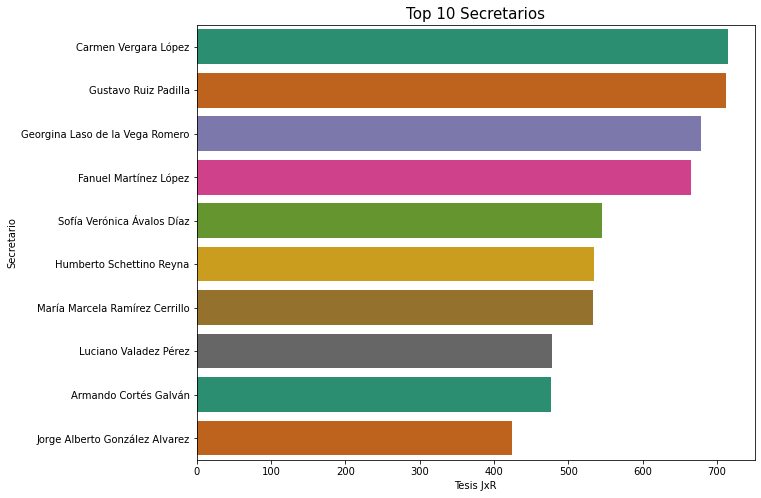

In [69]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Secretario', x = 'Conteo', data = top20_secr.iloc[0:10], palette = 'Dark2')
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Top 10 Secretarios', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Secretario')
plt.show()

In [70]:
top_secr_ep6 = pd.DataFrame(tesis_secr_expand.loc[tesis_secr_expand['epoca']=='Sexta Época'][['S1','S2','S3','S4','S5','S6']]\
                            .apply(pd.Series.value_counts).fillna(0).sum(1)\
                            .sort_values(ascending=False).astype(int).head(21)).reset_index()
top_secr_ep6 = top_secr_ep6.rename(columns={'index':'Secretario',0:'Conteo'})
top_secr_ep6 = top_secr_ep6[top_secr_ep6.Secretario != 'NA']
top_secr_ep6

,Secretario,Conteo
1,Jesús Toral Moreno,3
2,Emilio Canseco,1
3,Genaro Martínez Moreno,1


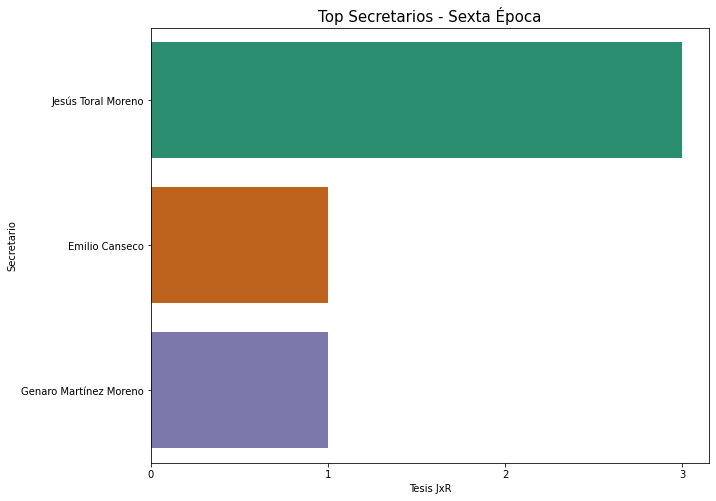

In [71]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Secretario', x = 'Conteo', data = top_secr_ep6.iloc[0:10], palette = 'Dark2')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Top Secretarios - Sexta Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Secretario')
plt.show()

In [72]:
top_secr_ep7 = pd.DataFrame(tesis_secr_expand.loc[tesis_secr_expand['epoca']=='Séptima Época'][['S1','S2','S3','S4','S5','S6']]\
                            .apply(pd.Series.value_counts).fillna(0).sum(1)\
                            .sort_values(ascending=False).astype(int).head(21)).reset_index()
top_secr_ep7 = top_secr_ep7.rename(columns={'index':'Secretario',0:'Conteo'})
top_secr_ep7 = top_secr_ep7[top_secr_ep7.Secretario != 'NA']
top_secr_ep7

,Secretario,Conteo
1,Ignacio Magaña Cárdenas,106
2,F. Javier Mijangos Navarro,40
3,Guillermo Ariza Bracamontes,36
4,María del Carmen Sánchez Hidalgo,35
5,Héctor Santacruz Fernández,31
6,Fausta Moreno Flores,31
7,J. Tomás Garrido Muñoz,31
8,Delfino Solano Yañez,31
9,Miguel Bonilla Solís,30
10,Joaquín Dzib Núñez,30


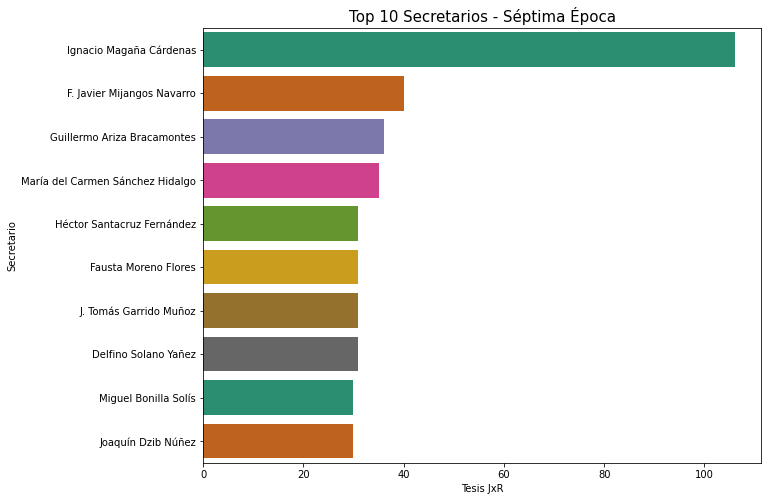

In [73]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Secretario', x = 'Conteo', data = top_secr_ep7.iloc[0:10], palette = 'Dark2')
plt.title('Top 10 Secretarios - Séptima Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Secretario')
plt.show()

In [74]:
top_secr_ep8 = pd.DataFrame(tesis_secr_expand.loc[tesis_secr_expand['epoca']=='Octava Época'][['S1','S2','S3','S4','S5','S6']]\
                            .apply(pd.Series.value_counts).fillna(0).sum(1)\
                            .sort_values(ascending=False).astype(int).head(21)).reset_index()
top_secr_ep8 = top_secr_ep8.rename(columns={'index':'Secretario',0:'Conteo'})
top_secr_ep8 = top_secr_ep8[top_secr_ep8.Secretario != 'NA']
top_secr_ep8

,Secretario,Conteo
1,Jorge Alberto González Alvarez,358
2,Armando Cortés Galván,308
3,Humberto Schettino Reyna,285
4,Nelson Loranca Ventura,141
5,José Mario Machorro Castillo,135
6,Guillermo Báez Pérez,126
7,Lourdes Ferrer Mac Gregor Poisot,118
8,Vicente Martínez Sánchez,112
9,Manuel Acosta Tzintzun,103
10,María Estela Ferrer Mac Gregor Poisot,102


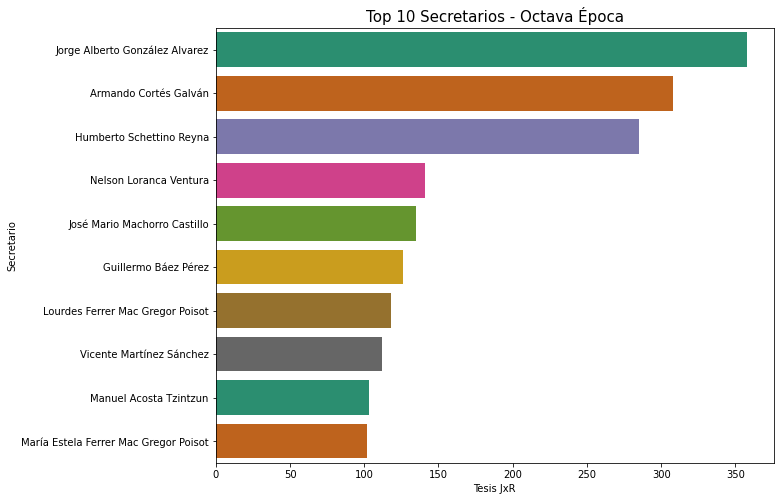

In [75]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Secretario', x = 'Conteo', data = top_secr_ep8.iloc[0:10], palette = 'Dark2')
plt.title('Top 10 Secretarios - Octava Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Secretario')
plt.show()

In [76]:
top_secr_ep9 = pd.DataFrame(tesis_secr_expand.loc[tesis_secr_expand['epoca']=='Novena Época'][['S1','S2','S3','S4','S5','S6']]\
                            .apply(pd.Series.value_counts).fillna(0).sum(1)\
                            .sort_values(ascending=False).astype(int).head(21)).reset_index()
top_secr_ep9 = top_secr_ep9.rename(columns={'index':'Secretario',0:'Conteo'})
top_secr_ep9 = top_secr_ep9[top_secr_ep9.Secretario != 'NA']
top_secr_ep9

,Secretario,Conteo
1,Gustavo Ruiz Padilla,711
2,Carmen Vergara López,696
3,Sofía Verónica Ávalos Díaz,545
4,María Marcela Ramírez Cerrillo,508
5,Georgina Laso de la Vega Romero,498
6,Luciano Valadez Pérez,478
7,Juan Carlos Roa Jacobo,412
8,Rolando Javier García Martínez,351
9,Verónica Nava Ramírez,337
10,Jorge Luis Revilla de la Torre,276


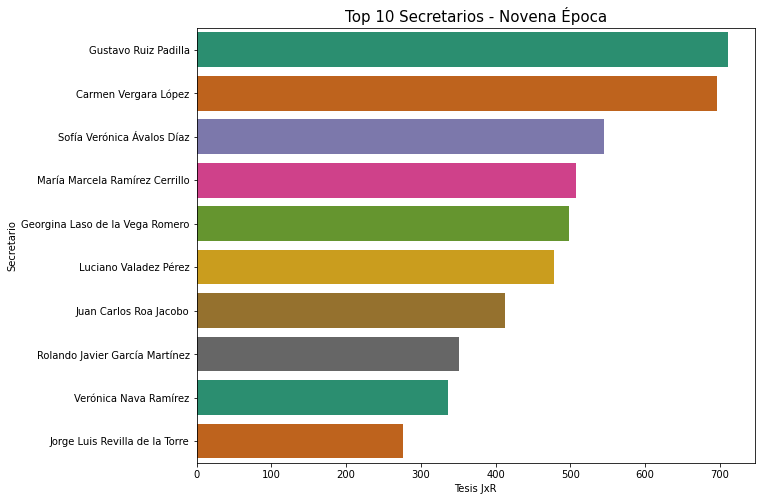

In [77]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Secretario', x = 'Conteo', data = top_secr_ep9.iloc[0:10], palette = 'Dark2')
plt.title('Top 10 Secretarios - Novena Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Secretario')
plt.show()

In [78]:
top_secr_ep10 = pd.DataFrame(tesis_secr_expand.loc[tesis_secr_expand['epoca']=='Décima Época'][['S1','S2','S3','S4','S5','S6']]\
                            .apply(pd.Series.value_counts).fillna(0).sum(1)\
                            .sort_values(ascending=False).astype(int).head(21)).reset_index()
top_secr_ep10 = top_secr_ep10.rename(columns={'index':'Secretario',0:'Conteo'})
top_secr_ep10 = top_secr_ep10[top_secr_ep10.Secretario != 'NA']
top_secr_ep10

,Secretario,Conteo
1,Fanuel Martínez López,420
2,Georgina Laso de la Vega Romero,181
3,Claudia Mendoza Polanco,171
4,Gabriel Regis López,167
5,Oscar Vázquez Moreno,158
6,Julio Veredín Sena Velázquez,149
7,José Díaz de León Cruz,133
8,Jorge Roberto Ordóñez Escobar,121
9,Luis Javier Guzmán Ramos,111
10,Joel Isaac Rangel Agüeros,109


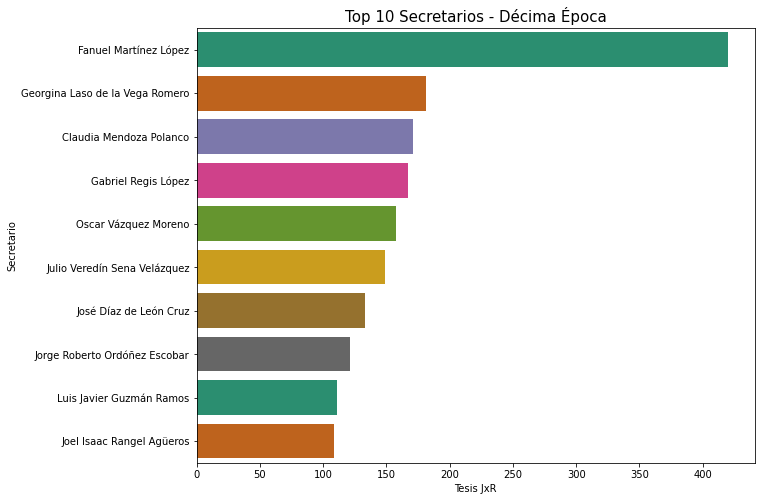

In [79]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Secretario', x = 'Conteo', data = top_secr_ep10.iloc[0:10], palette = 'Dark2')
plt.title('Top 10 Secretarios - Décima Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Secretario')
plt.show()

In [80]:
top_secr_ep11 = pd.DataFrame(tesis_secr_expand.loc[tesis_secr_expand['epoca']=='Undécima Época'][['S1','S2','S3','S4','S5','S6']]\
                            .apply(pd.Series.value_counts).fillna(0).sum(1)\
                            .sort_values(ascending=False).astype(int).head(21)).reset_index()
top_secr_ep11 = top_secr_ep11.rename(columns={'index':'Secretario',0:'Conteo'})
top_secr_ep11 = top_secr_ep11[top_secr_ep11.Secretario != 'NA']
top_secr_ep11

,Secretario,Conteo
1,Iván Güereña González,4
2,Arturo Navarro Plata,3
3,Héctor Orduña Sosa,2
4,Luis González Bardán,2
5,Emma Rivera Contreras,2
6,Luz Adriana Campos Acosta,2
7,Daniel Dámaso Castro Vera,2
8,Karla Maribet Hernández Segovia,2
9,Alberto Carrillo Ruvalcaba,2
10,Juvenal Carbajal Díaz,2


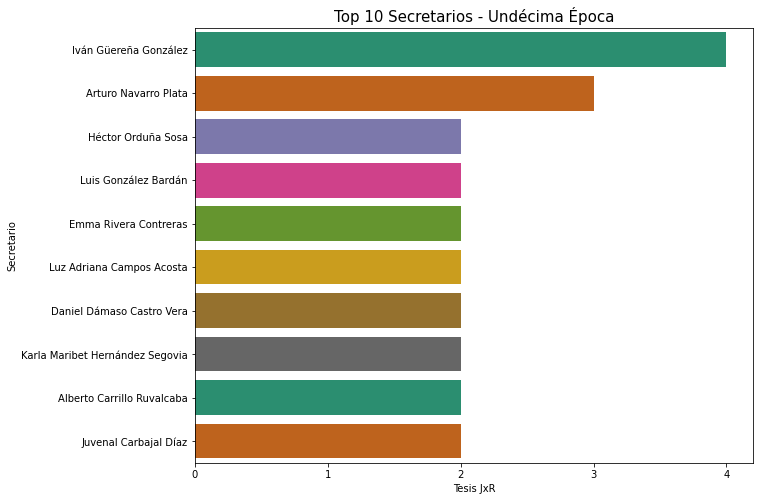

In [81]:
plt.figure(figsize = (10,8))
ax = sns.barplot(y = 'Secretario', x = 'Conteo', data = top_secr_ep11.iloc[0:10], palette = 'Dark2')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Top 10 Secretarios - Undécima Época', fontsize=15)
plt.xlabel('Tesis JxR')
plt.ylabel('Secretario')
plt.show()

### ---Código Extra---

In [82]:
tesis_materia = pd.DataFrame(tesis_juris.groupby(['id_tesis','materia'], as_index=False).size().drop(columns=['size'])['materia'].value_counts(dropna=False))
tesis_materia = tesis_materia.rename(columns = {'materia':'counts'})
tesis_materia.index = [' '.join(sorted(x)) for x in tesis_materia.index.str.split()]
tesis_materia.index = tesis_materia.index.str.replace(',', '')
tesis_materia = tesis_materia.rename_axis('materia')
tesis_materia = pd.DataFrame(tesis_materia.groupby(['materia']).sum())
tesis_materia.reset_index(inplace=True)
tesis_materia

,materia,counts
0,Administrativa,2041
1,Administrativa Civil,5
2,Administrativa Civil Constitucional,4
3,Administrativa Común,218
4,Administrativa Común Constitucional,14
5,Administrativa Común Laboral,5
6,Administrativa Constitucional,1209
7,Administrativa Constitucional Laboral,5
8,Administrativa Constitucional Penal,1
9,Administrativa Laboral,35


In [83]:
tesis_materia[['1','2','3']] = tesis_materia['materia'].str.split(' ', expand=True)
tesis_materia

,materia,counts,1,2,3
0,Administrativa,2041,Administrativa,None,None
1,Administrativa Civil,5,Administrativa,Civil,None
2,Administrativa Civil Constitucional,4,Administrativa,Civil,Constitucional
3,Administrativa Común,218,Administrativa,Común,None
4,Administrativa Común Constitucional,14,Administrativa,Común,Constitucional
5,Administrativa Común Laboral,5,Administrativa,Común,Laboral
6,Administrativa Constitucional,1209,Administrativa,Constitucional,None
7,Administrativa Constitucional Laboral,5,Administrativa,Constitucional,Laboral
8,Administrativa Constitucional Penal,1,Administrativa,Constitucional,Penal
9,Administrativa Laboral,35,Administrativa,Laboral,None
